<h1 style="font-size:3rem;color:maroon;">Regression Moddelling for Gas Production</h1>


<h1 style="font-size:2rem;color:gray;">Time Series forecasting</h1>


<h1 style="font-size:2rem;color:red;">1.0.0 Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Normalization
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

#evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h1 style="font-size:2rem;color:red;">1.1.0 Datasets</h1>

In [3]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

In [4]:
bio1_phase0 = df[(df['bio_id'] == 1) & (df['phase_test'] == 0)].reset_index()
bio1_phase1 = df[(df['bio_id'] == 1) & (df['phase_test'] == 1)].reset_index()
bio1_phase2 = df[(df['bio_id'] == 1) & (df['phase_test'] == 2)].reset_index()
bio1_phase3 = df[(df['bio_id'] == 1) & (df['phase_test'] == 3)].reset_index()
bio2_phase0 = df[(df['bio_id'] == 2) & (df['phase_test'] == 0)].reset_index()
bio2_phase1 = df[(df['bio_id'] == 2) & (df['phase_test'] == 1)].reset_index()
bio2_phase2 = df[(df['bio_id'] == 2) & (df['phase_test'] == 2)].reset_index()
bio2_phase3 = df[(df['bio_id'] == 2) & (df['phase_test'] == 3)].reset_index()

In [5]:
print(f"bio1_phase0 : {bio1_phase0.shape}")
print(f"bio1_phase1 : {bio1_phase1.shape}")
print(f"bio1_phase2 : {bio1_phase2.shape}")
print(f"bio1_phase3 : {bio1_phase3.shape}")
print(f"bio2_phase0 : {bio1_phase0.shape}")
print(f"bio2_phase1 : {bio1_phase1.shape}")
print(f"bio2_phase2 : {bio1_phase2.shape}")
print(f"bio2_phase3 : {bio1_phase3.shape}")

bio1_phase0 : (5109, 14)
bio1_phase1 : (10875, 14)
bio1_phase2 : (4919, 14)
bio1_phase3 : (3653, 14)
bio2_phase0 : (5109, 14)
bio2_phase1 : (10875, 14)
bio2_phase2 : (4919, 14)
bio2_phase3 : (3653, 14)


Bio1_phase1 and Bio2_phase1 has high number of entries

In [6]:
# using bio1_phase1
data = bio1_phase1.sort_values(by='date',ascending=True).reset_index()

In [7]:
data

,level_0,index,date,hour,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
0,8171,21852,2021-11-01,16:45:34,18.12,18.94,77.8,23.5,84.17,23.52,0.00,1,1,11,16
1,8176,21857,2021-11-01,18:00:35,18.19,18.94,88.4,19.9,83.37,19.40,0.00,1,1,11,18
2,8175,21856,2021-11-01,17:45:33,18.12,18.94,87.9,19.9,82.73,19.89,0.00,1,1,11,17
3,8174,21855,2021-11-01,17:30:34,18.12,18.94,83.9,21.0,83.03,21.72,0.00,1,1,11,17
4,8173,21854,2021-11-01,17:15:32,18.12,18.94,83.2,21.6,83.89,22.86,0.00,1,1,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,5358,13834,2022-02-28,06:56:18,23.44,24.25,92.1,21.9,87.54,21.23,0.01,1,1,2,6
10871,5357,13833,2022-02-28,06:53:09,23.44,24.25,92.3,21.8,87.38,21.08,0.00,1,1,2,6
10872,5356,13832,2022-02-28,06:38:08,23.44,24.25,92.7,21.8,87.31,21.02,0.00,1,1,2,6
10873,5353,13829,2022-02-28,05:53:09,23.44,24.25,92.7,21.9,87.18,21.02,0.00,1,1,2,5


In [8]:
#Extracting last day
data_last_day = data[(data['date'] == '2022-02-28')]

# sorting using hours
data_last_days_hour = data.sort_values(by="Hour", ascending=True)

In [9]:
data_last_days_hour

,level_0,index,date,hour,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
6758,6513,14989,2022-01-13,00:28:00,21.69,22.19,94.6,19.2,NaN,NaN,0.0,1,1,1,0
8446,2932,11408,2022-02-02,00:20:45,22.94,23.31,91.0,20.7,NaN,NaN,0.0,1,1,2,0
8447,2931,11407,2022-02-02,00:05:45,22.94,23.31,90.7,20.9,NaN,NaN,0.0,1,1,2,0
6649,6417,14893,2022-01-12,00:37:57,21.81,22.25,95.6,18.9,NaN,NaN,0.0,1,1,1,0
10228,4756,13232,2022-02-22,00:08:56,22.81,24.00,90.7,21.2,88.07,20.19,0.0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10035,4658,13134,2022-02-20,23:44:53,22.75,23.88,96.4,20.6,85.29,19.27,0.0,1,1,2,23
10039,4657,13133,2022-02-20,23:29:54,22.75,23.88,94.8,20.7,85.00,19.35,0.0,1,1,2,23
10040,4656,13132,2022-02-20,23:14:52,22.75,23.88,94.3,20.9,85.28,19.77,0.0,1,1,2,23
758,8931,22612,2021-11-09,23:25:33,19.56,-127.00,91.3,17.9,82.96,16.77,0.0,1,1,11,23


In [49]:
# Group by hours
data_hourly_grouped = data_last_days_hour.groupby("Hour").mean().reset_index()
data_hourly_group = data_hourly_grouped.drop(columns=["level_0","index","bio_id", "phase_test","Month"], axis=1)
data_hourly_group['dm3_gas'] = data_hourly_group['dm3_gas']*1000

In [50]:
data_hourly_group.isna().sum()

Hour           0
fluid_temp     0
ground_temp    0
air_umidity    0
air_temp       0
gas_umidity    0
gas_temp       0
dm3_gas        0
dtype: int64

In [51]:
# creating lags for the last 24hrs
data_columns = ['gas_temp', 'gas_umidity',"air_temp","ground_temp", "fluid_temp"]
lags = 24
for feature in data_columns:
    for lag in range(1, lags + 1):
        data_hourly_group[f'{feature}_lag_{lag}'] = data_hourly_group[feature].shift(lag)

In [52]:
data_hourly_group

,Hour,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,gas_temp_lag_1,gas_temp_lag_2,...,fluid_temp_lag_15,fluid_temp_lag_16,fluid_temp_lag_17,fluid_temp_lag_18,fluid_temp_lag_19,fluid_temp_lag_20,fluid_temp_lag_21,fluid_temp_lag_22,fluid_temp_lag_23,fluid_temp_lag_24
0,0,21.667891,12.590907,93.154422,18.637415,84.194199,17.319116,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,21.673129,12.929841,93.767120,18.342177,84.345084,17.114078,0.000000,17.319116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21.659841,12.874692,94.253075,18.126879,84.450056,16.903278,0.000000,17.114078,17.319116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21.665718,12.882802,94.742597,17.938269,84.560447,17.030556,0.022779,16.903278,17.114078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,21.680455,12.921136,95.194773,17.699545,84.589290,16.423956,0.000000,17.030556,16.903278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,21.665179,13.035650,95.606951,17.513453,84.703424,16.266087,0.336323,16.423956,17.030556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,21.679583,12.600833,94.718640,18.120833,85.471168,17.082081,0.679825,16.266087,16.423956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,21.749016,13.917029,91.481967,19.622951,86.832741,19.444796,0.655738,17.082081,16.266087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,21.689847,13.280919,84.336324,21.819037,86.321385,26.492959,0.415755,19.444796,17.082081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,21.671674,12.731071,75.576116,24.305357,80.171230,33.275829,0.156250,26.492959,19.444796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
lagged_data = data_hourly_group
lagged_data = lagged_data.fillna(0)

In [54]:
# creating data and target variables
X = lagged_data.drop('dm3_gas', axis=1)

y = lagged_data['dm3_gas']

In [55]:
X_train, X_test,y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((19, 127), (5, 127), (19,), (5,))

In [56]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

#filling missing values
X_train_scaled_filled = X_train_scaled.fillna(0)
X_test_scaled_filled = X_test_scaled.fillna(0)

<h1 style="font-size:3rem;color:blue;">3.0.0 Modelling</h1>

In [57]:
# iteratng through several models to get the best performing one.

models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=1)
}

for name, model in models.items():
    model.fit(X_train_scaled_filled, y_train)
    print(f"{name}: {model.score(X_test_scaled_filled, y_test)}")

RandomForestRegressor: 0.05240139701002178
DecisionTreeRegressor: -0.7272433951940371
Ridge: 0.8814565937582833
Lasso: -0.011604796803907691


Ridge Regressor performes better

<h1 style="font-size:2rem;color:blue;">3.1.0 Grid Search</h1>

<h1 style="font-size:1.5rem;color:blue;">3.1.1 ridge Regression</h1>

In [19]:
%%time

from sklearn.model_selection import GridSearchCV

parameters = {"alpha": [1, 10, 100, 290, 500],
              "fit_intercept": [True, False],
              "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 
             }

grid = GridSearchCV(estimator=Ridge(alpha=1), param_grid = parameters, cv = 2, n_jobs=-1)


grid.fit(X_train_scaled_filled, y_train)

best_model = grid.best_estimator_
print(f"Best model: {best_model}")
print(f"Best score: {grid.best_score_}")


Best model: Ridge(alpha=290, fit_intercept=False, solver='sag')
Best score: -0.4517205635098467
CPU times: total: 312 ms
Wall time: 8.15 s


In [20]:
best_model.fit(X_train_scaled_filled, y_train)
best_model.score(X_test_scaled_filled, y_test)

-0.7715741320412353

Performance serverely dropped

<h1 style="font-size:1.5rem;color:blue;">3.1.2 grid Search in  Random forest Regressor</h1>

In [21]:
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

estimator=RandomForestRegressor()

grid = GridSearchCV(estimator, para_grids)


grid.fit(X_train_scaled_filled, y_train)

best_model = grid.best_estimator_
print(f"Best model: {best_model}")
print(f"Best score: {grid.best_score_}")

Best model: RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=10)
Best score: -0.1659422948621947


After gridsearching the model it performs worse

<h1 style="font-size:2.5rem;color:blue;">3.2.0 RandomForest Regressor</h1>

In [22]:
rfr = RandomForestRegressor()
rfr_model = rfr.fit(X_train_scaled_filled, y_train)

In [23]:
rfr_model.score(X_test_scaled_filled, y_test)

-0.04579195429003491

In [24]:
preds = rfr_model.predict(X_train_scaled_filled)

In [25]:
modelled = pd.DataFrame({'preds' : preds,
                        'Hour' : X_train.Hour,
                        'dm3' : y_train.values}
                )

In [26]:
modelled = modelled.sort_values(by="Hour", ascending=True)

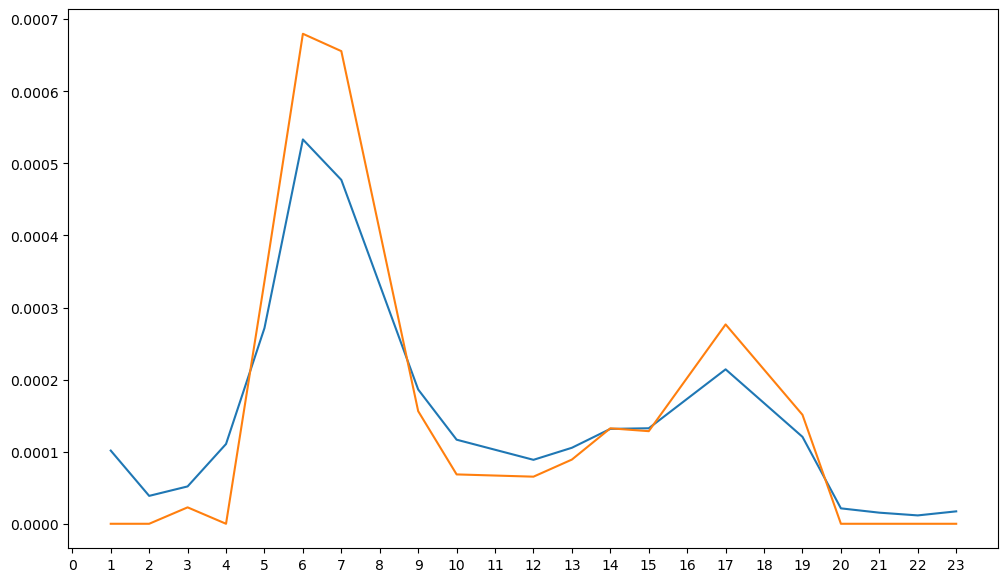

In [27]:
#Visualization
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(modelled.Hour, modelled.preds)
ax.plot(modelled.Hour, modelled.dm3)
ax.set_xticks(np.arange(0, 24, step=1))
plt.show()

The Random Forest doesn't predict quite to be relied on

<h1 style="font-size:2.5rem;color:blue;"> 3.2.0 Ridge Regression Model</h1>

In [58]:
ridge = Ridge(alpha=1)
ridge = ridge.fit(X_train_scaled_filled, y_train)
ridge.score(X_test_scaled_filled, y_test)

0.8814565937582833

In [59]:
#ridge predictions
preds_ridge = ridge.predict(X_train_scaled_filled)

In [60]:
modelled_ridge = pd.DataFrame({'preds' : preds_ridge,
                        'Hour' : X_train.Hour,
                        'dm3' : y_train.values}
                )

In [61]:
modelled_ridge = modelled_ridge.sort_values(by="Hour", ascending=True)

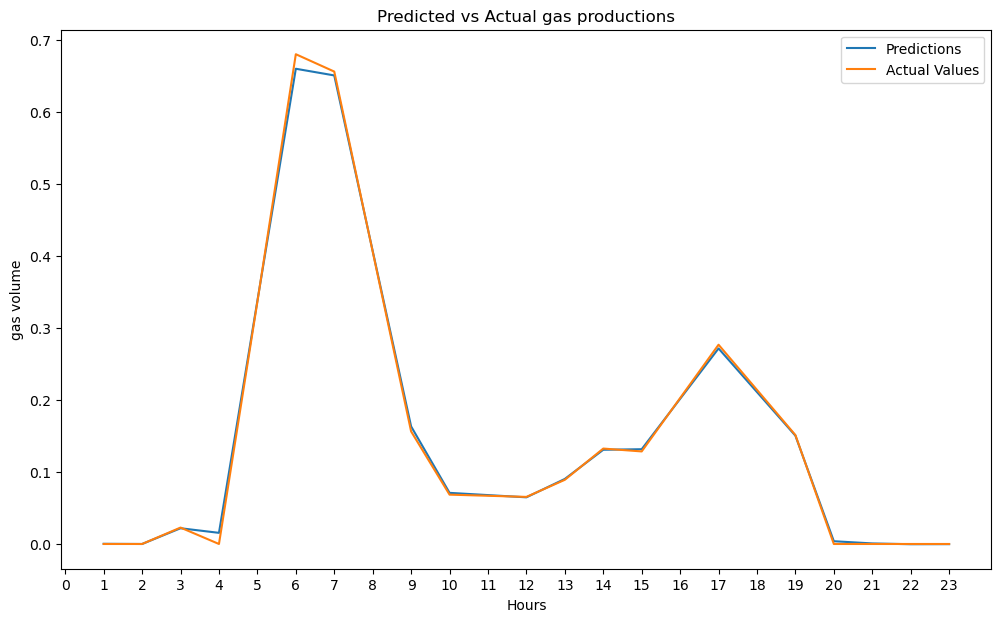

In [62]:
#Visualization
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(modelled_ridge.Hour, modelled_ridge.preds, label = "Predictions")
ax.plot(modelled_ridge.Hour, modelled_ridge.dm3, label = "Actual Values")
ax.set_xticks(np.arange(0, 24, step=1))
ax.set_ylabel("gas volume")
ax.set_xlabel("Hours")
plt.title("Predicted vs Actual gas productions")
plt.legend()
plt.show()

Ridge Model performed quite well

## Neural Network for Multi-Output Regression

In [33]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

# get the dataset
X = data_hourly_grouped

y = data_hourly_group['dm3_gas']

model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(len(y)))


model.compile(loss='mae', optimizer='adam')
    
 
X_train, X_test,y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

#filling missing values
X_train_scaled_filled = X_train_scaled.fillna(0)
X_test_scaled_filled = X_test_scaled.fillna(0)

model.fit(X_train, y_train, verbose=0, epochs=100)



mae = model.evaluate(X_test, y_test, verbose=0)
print(mae)


ModuleNotFoundError: No module named 'tensorflow'

Sequential Model had a lower  score that of Ridge Regression model

<h1 style="font-size:2.5rem;color:maroon;">Hyperparameter Tune Ridge Regression</h1>

<h1 style="font-size:2rem;color:purple;">1.1 Feature Selection</h1>

<h1 style="font-size:1.5rem;color:blue;">1.1.0Recursive Feature Elimination</h1>

In [63]:
X = lagged_data.drop('dm3_gas', axis=1)

y = lagged_data['dm3_gas']

ridge = Ridge(alpha=1)
rfe = RFE(ridge, n_features_to_select= 125)  
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
rfe_data = X[selected_features]

X_train, X_test,y_train,  y_test = train_test_split(rfe_data, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

#filling missing values
X_train_scaled_filled = X_train_scaled.fillna(0)
X_test_scaled_filled = X_test_scaled.fillna(0)

In [64]:
rfe_data = X[selected_features]

In [65]:
#X_train, X_test,y_train,  y_test = train_test_split(rfe_data, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((19, 125), (5, 125), (19,), (5,))

In [66]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

#filling missing values
X_train_scaled_filled = X_train_scaled.fillna(0)
X_test_scaled_filled = X_test_scaled.fillna(0)

In [67]:
ridge = Ridge(alpha=1)
ridge = ridge.fit(X_train_scaled_filled, y_train)
ridge.score(X_test_scaled_filled, y_test)

0.8814565937582833

In [68]:
#ridge predictions
preds_ridge = ridge.predict(X_train_scaled_filled)

In [69]:
modelled_ridge = pd.DataFrame({'preds' : preds_ridge,
                        'Hour' : X_train.Hour,
                        'dm3' : y_train.values}
                )

In [70]:
modelled_ridge = modelled_ridge.sort_values(by="Hour", ascending=True)

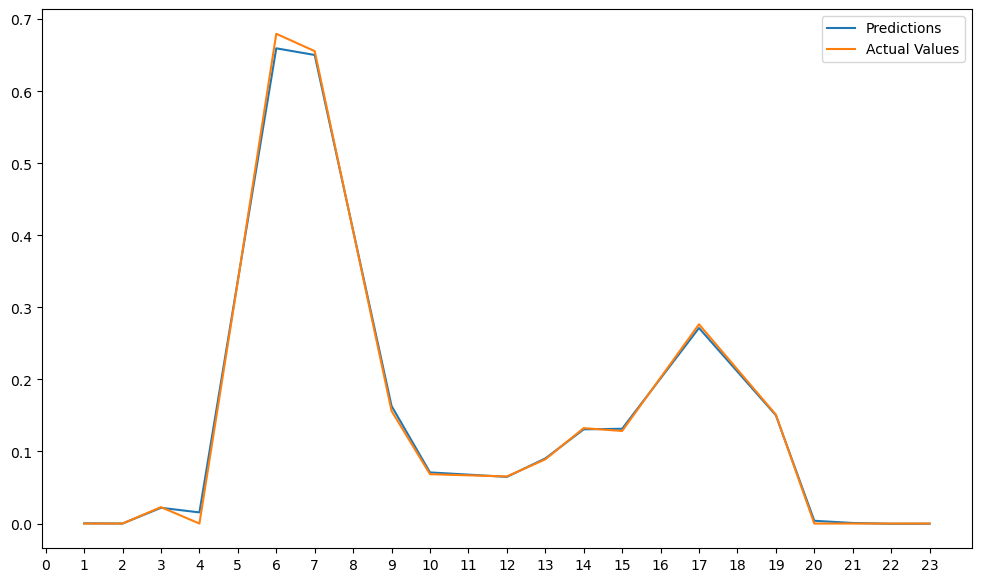

In [71]:
#Visualization
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(modelled_ridge.Hour, modelled_ridge.preds, label = "Predictions")
ax.plot(modelled_ridge.Hour, modelled_ridge.dm3, label = "Actual Values")
ax.set_xticks(np.arange(0, 24, step=1))
plt.legend()
plt.show()

<h1 style="font-size:2.5rem;color:maroon;">Creating  Input values</h1>

### A simple demo of input to prediction

In [72]:
# Key-in the inputs
gas_temp = float(input("Gas Temperatures: "))
gas_umidity = float(input("gas humidity"))
air_temp = float(input("gair_temp"))
ground_temp = float(input("gground_temp"))
fluid_temp = float(input("fluid_temp"))

Gas Temperatures: 23
gas humidity56
gair_temp343
gground_temp33
fluid_temp24


In [74]:
inputs = pd.DataFrame({'gas_temp' : [gas_temp], 'gas_umidity' : [gas_umidity],  "air_temp"  : [air_temp], "ground_temp" : [ground_temp], "fluid_temp" : [fluid_temp] })

In [75]:
def prediction(inputs):
    data_columns = ['gas_temp', 'gas_umidity',"air_temp","ground_temp", "fluid_temp"]
    lags = 24
    for feature in data_columns:
        for lag in range(1, lags + 1):
            inputs[f'{feature}_lag_{lag}'] = inputs[feature].shift(lag)
    inputs = inputs.fillna(0)
    inputs_scaled = scaler.fit_transform(inputs)
    preed = ridge.predict(inputs_scaled)
    return preed

In [76]:
preed = prediction(inputs)

In [77]:
preed

array([0.14539828])